In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely
import scipy
from shapely.geometry import Polygon, Point
from shapely import wkt
from sunpy.time import parse_time


In [4]:
flare_set = pd.read_csv('flares_dataset.csv', delimiter = ',', header = 0)

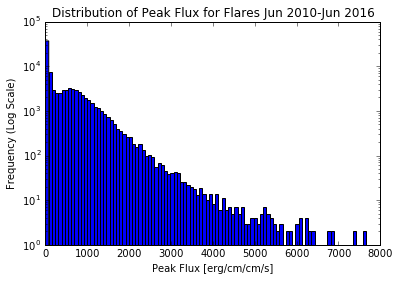

In [161]:
peak_flux = flare_set['fl_peakflux']

_ = plt.hist(peak_flux, bins = 100, log = True)
_ = plt.title('Distribution of Peak Flux for Flares Jun 2010-Jun 2016')
_ = plt.ylabel('Frequency (Log Scale)')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

In [5]:
#look at this histogram on a month by month basis, will a diff pattern emerge given solar cycle?

In [3]:
flare_ef = pd.read_csv('flare_search_2014-01-01_2014-06-30_60_300.csv', delimiter = ',', header = 0)

unique_flare = flare_ef.SOL_standard.unique()
print len(unique_flare)

5037


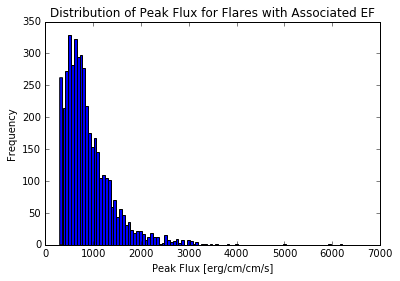

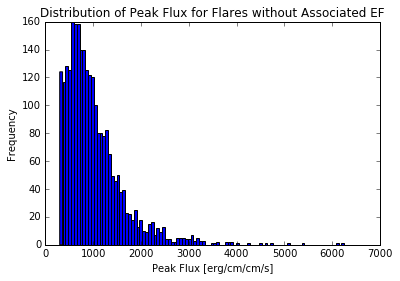

In [12]:
associated_ef = flare_ef['associated_ef']
no_ef_flares = flare_ef.ix[flare_ef['is_ef']==0]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]

peak_flux_ef = ef_flares['fl_peakflux']
peak_flux_no_ef = no_ef_flares['fl_peakflux']

_ = plt.hist(peak_flux_ef, bins = 100, log = False)
_ = plt.title('Distribution of Peak Flux for Flares with Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

plt.show()

_ = plt.hist(peak_flux_no_ef, bins = 100, log = False)
_ = plt.title('Distribution of Peak Flux for Flares without Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

plt.show()

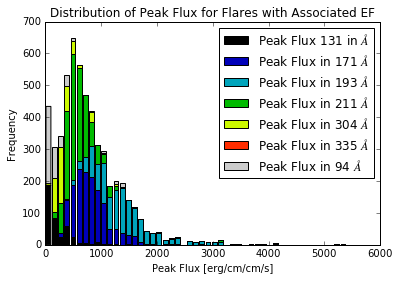

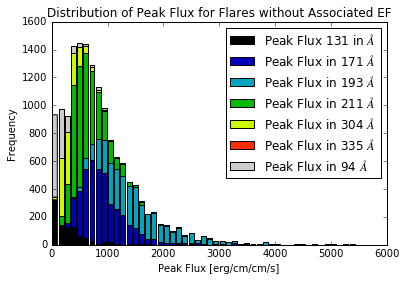

In [8]:
flaress = pd.read_csv('flare_search_2014-01-01_2014-12-31_60_300.csv', delimiter = ',', header = 0)

no_ef_flares = flaress.ix[flaress['is_ef']==0]
ef_flares = flaress.ix[flaress['is_ef']==1]
n =7
colormap = plt.cm.nipy_spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
fl_peakfluxs_no_ef = no_ef_flares.as_matrix(columns=['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 
                                            'fl_peakflux_211', 'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94'])
fl_peakfluxs_ef = ef_flares.as_matrix(columns=['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
                                  'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94'])

# fl_peakfluxs_no_ef = no_ef_flares[['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
#                                   'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94']]

# fl_peakfluxs_ef = ef_flares[['fl_peakflux_131', 'fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
#                                   'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94']]

label = [r'Peak Flux 131 in $\AA$',r'Peak Flux in 171 $\AA$',r'Peak Flux in 193 $\AA$', r'Peak Flux in 211 $\AA$',
                                  r'Peak Flux in 304 $\AA$', r'Peak Flux in 335 $\AA$', r'Peak Flux in 94 $\AA$']

_ = plt.hist(fl_peakfluxs_ef, bins = 50, stacked = True, range = (1, 5500), label = label)
_ = plt.title('Distribution of Peak Flux for Flares with Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.legend()

plt.show()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
_ = plt.hist(fl_peakfluxs_no_ef, bins = 50, stacked = True, range = (1, 5550), label = label)
_ = plt.title('Distribution of Peak Flux for Flares without Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.legend()


In [3]:
flare_new = pd.read_csv('flare_dataset_cleaned.csv', delimiter = ',', header = 0)

In [13]:
# no_ef_flares = flare_new.ix[flaress['is_ef']==0]
# ef_flares = flare_new.ix[flaress['is_ef']==1]
def ignore_nones(time):
    if len(str(time)) < 5:
        time = '2010-01-01T00:00:00'
    time = parse_time(time)
    return time
flare_new = flare_new.ix[flare_new['sum_peakflux']>=5000]
fl_peak= np.array(map(parse_time, flare_new['event_peaktime']))
peak_131= np.array(map(ignore_nones, flare_new['peaktime_131']))
peak_171= np.array(map(ignore_nones, flare_new['peaktime_171']))
peak_193= np.array(map(ignore_nones, flare_new['peaktime_193']))
peak_211= np.array(map(ignore_nones, flare_new['peaktime_211']))
peak_304= np.array(map(ignore_nones, flare_new['peaktime_304']))
peak_335= np.array(map(ignore_nones, flare_new['peaktime_335']))
peak_94 = np.array(map(ignore_nones, flare_new['peaktime_94']))
diff131 = peak_131-fl_peak
diff131 = map(lambda x: (x.total_seconds())/60, diff131)
diff171 = peak_171-fl_peak
diff171 = map(lambda x: (x.total_seconds())/60, diff171)
diff211 = peak_211-fl_peak
diff211 = map(lambda x: (x.total_seconds())/60, diff211)
diff193 = peak_193-fl_peak
diff193 = map(lambda x: (x.total_seconds())/60, diff193)
diff304 = peak_304-fl_peak
diff304 = map(lambda x: (x.total_seconds())/60, diff304)
diff335 = peak_335-fl_peak
diff335 = map(lambda x: (x.total_seconds())/60, diff335)
diff94 = peak_94-fl_peak
diff94 = map(lambda x: (x.total_seconds())/60, diff94)

setOdiffs = (np.vstack((diff131, diff171, diff193, diff211, diff304, diff335, diff94))).T


In [37]:
#131, 171, 211, 193, 304, 335, 94
def ignore_nones(time):
    if len(str(time)) < 5:
        time = '2010-01-01T00:00:00'
    time = parse_time(time)
    return time
flare_new = flare_new.ix[flare_new['sum_peakflux']>=5000]
fl_peak= np.array(map(parse_time, flare_new['event_peaktime']))
peak_131= np.array(map(ignore_nones, flare_new['peaktime_131']))
peak_171= np.array(map(ignore_nones, flare_new['peaktime_171']))
peak_193= np.array(map(ignore_nones, flare_new['peaktime_193']))
peak_211= np.array(map(ignore_nones, flare_new['peaktime_211']))
peak_304= np.array(map(ignore_nones, flare_new['peaktime_304']))
peak_335= np.array(map(ignore_nones, flare_new['peaktime_335']))
peak_94 = np.array(map(ignore_nones, flare_new['peaktime_94']))
def find_first_peak(a, b, c, d, e, f, g):
    wavelengths = [a, b, c, d, e, f, g]
    first_peak = wavelengths[0]
    for elem in wavelengths:
        if elem<=first_peak:
            first_peak = elem
    return first_peak
# fl_peak = map(find_first_peak, [peak_131, peak_171, peak_193, peak_211, peak_304, peak_335, peak_94])
fl_peak = map(lambda a, b, c, d, e, f, g: find_first_peak(a, b, c, d, e, f, g), 
              peak_131, peak_171, peak_193, peak_211, peak_304, peak_335, peak_94)
diff131 = peak_131-fl_peak
diff131 = map(lambda x: (x.total_seconds())/60, diff131)
diff171 = peak_171-fl_peak
diff171 = map(lambda x: (x.total_seconds())/60, diff171)
diff211 = peak_211-fl_peak
diff211 = map(lambda x: (x.total_seconds())/60, diff211)
diff193 = peak_193-fl_peak
diff193 = map(lambda x: (x.total_seconds())/60, diff193)
diff304 = peak_304-fl_peak
diff304 = map(lambda x: (x.total_seconds())/60, diff304)
diff335 = peak_335-fl_peak
diff335 = map(lambda x: (x.total_seconds())/60, diff335)
diff94 = peak_94-fl_peak
diff94 = map(lambda x: (x.total_seconds())/60, diff94)

setOdiffs = (np.vstack((diff131, diff171, diff193, diff211, diff304, diff335, diff94))).T

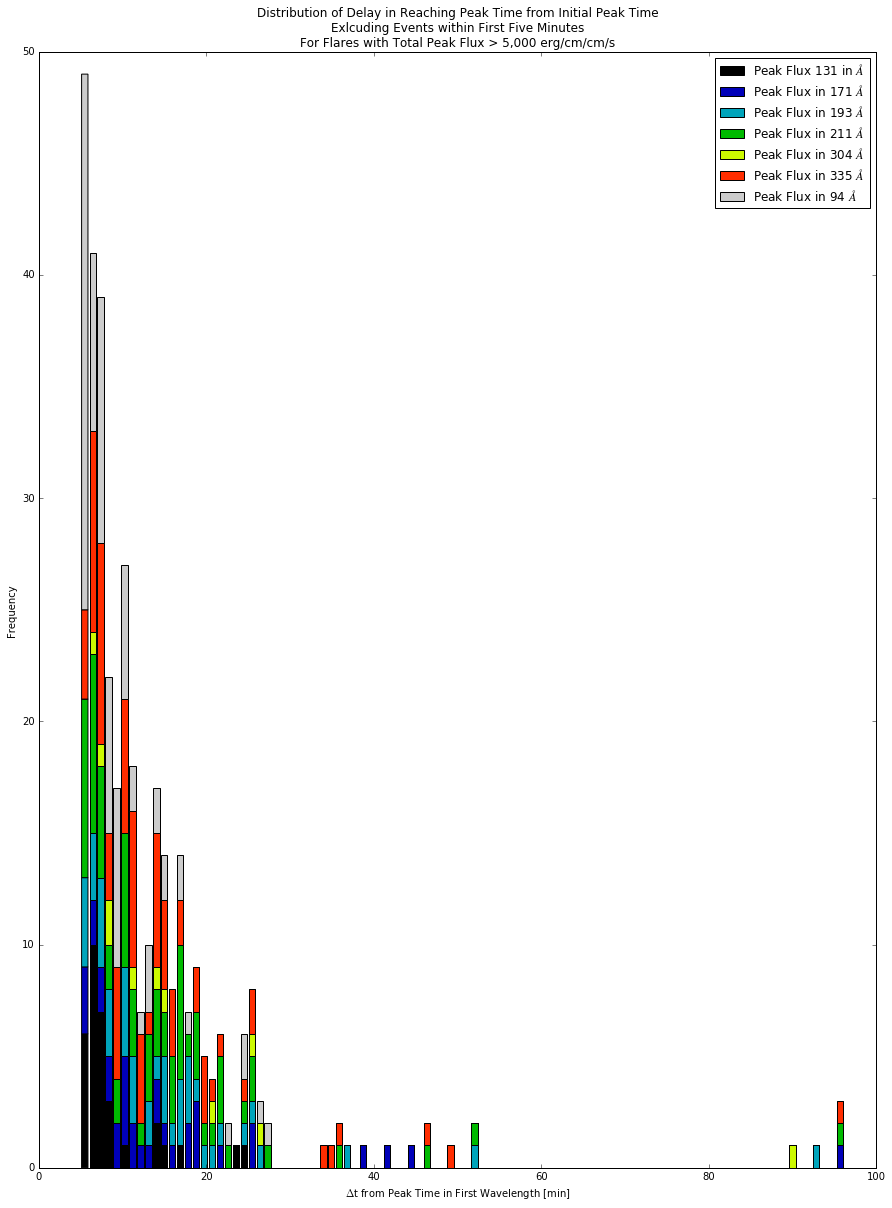

In [45]:
n =7

plt.figure(figsize=(15,20))
colormap = plt.cm.nipy_spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])

label = [r'Peak Flux 131 in $\AA$',r'Peak Flux in 171 $\AA$',r'Peak Flux in 193 $\AA$', r'Peak Flux in 211 $\AA$',
                                  r'Peak Flux in 304 $\AA$', r'Peak Flux in 335 $\AA$', r'Peak Flux in 94 $\AA$']

_ = plt.hist(setOdiffs, bins = 100, stacked = True, range = (5, 100), label = label)
_ = plt.title('''Distribution of Delay in Reaching Peak Time from Initial Peak Time
Exlcuding Events within First Five Minutes
For Flares with Total Peak Flux > 5,000 erg/cm/cm/s''')
_ = plt.ylabel('Frequency')
_ = plt.xlabel(r'$\Delta$t from Peak Time in First Wavelength [min]')
_ = plt.legend()
plt.savefig('histogram_peaktimes_delta_t_without_first_5_min.png')

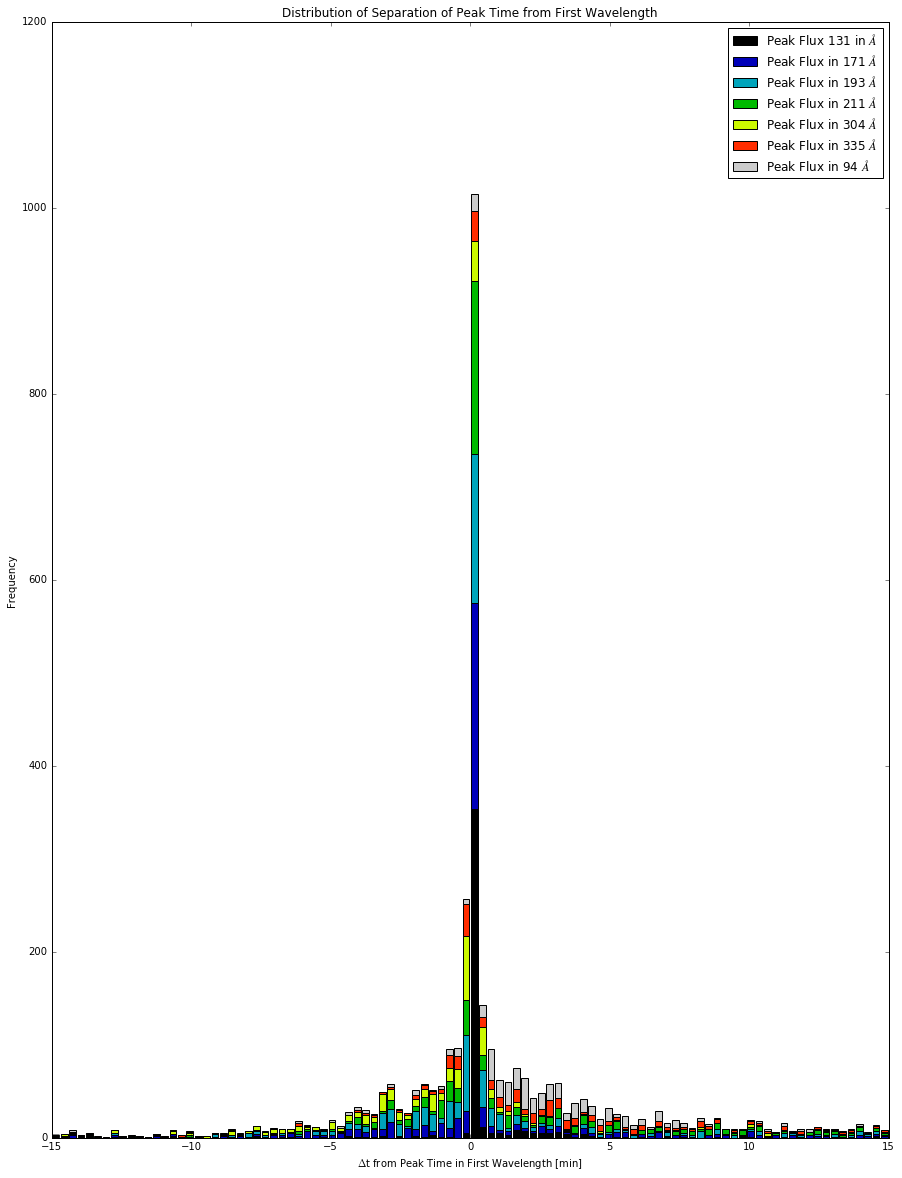

In [14]:
n =7

plt.figure(figsize=(15,20))
colormap = plt.cm.nipy_spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])

label = [r'Peak Flux 131 in $\AA$',r'Peak Flux in 171 $\AA$',r'Peak Flux in 193 $\AA$', r'Peak Flux in 211 $\AA$',
                                  r'Peak Flux in 304 $\AA$', r'Peak Flux in 335 $\AA$', r'Peak Flux in 94 $\AA$']

_ = plt.hist(setOdiffs, bins = 100, stacked = True, range = (-15, 15), label = label)
_ = plt.title('Distribution of Separation of Peak Time from First Wavelength')
_ = plt.ylabel('Frequency')
_ = plt.xlabel(r'$\Delta$t from Peak Time in First Wavelength [min]')
_ = plt.legend()

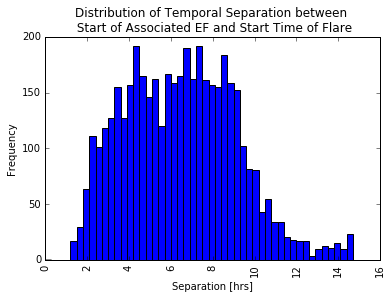

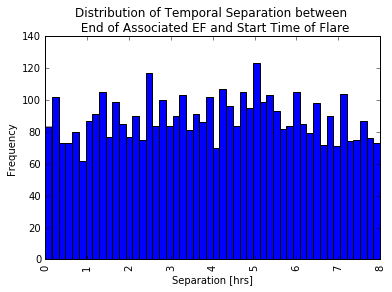

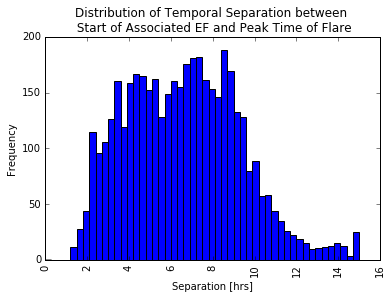

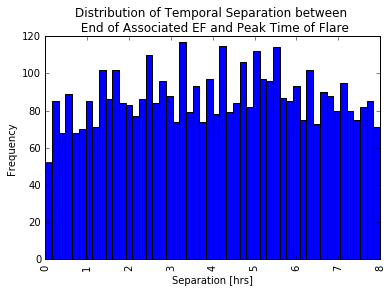

In [15]:
peak_flux_ef = ef_flares['fl_peakflux']
peak_flux_no_ef = no_ef_flares['fl_peakflux']
ef_start = np.array(map(parse_time, ef_flares['ef_starttime']))
ef_end = np.array(map(parse_time, ef_flares['ef_endtime']))
fl_start = np.array(map(parse_time, ef_flares['event_starttime']))
fl_peak = np.array(map(parse_time, ef_flares['event_peaktime']))

time_sep_start = fl_start - ef_start
time_sep_start = map(lambda x: (x.total_seconds())/3600, time_sep_start)
time_sep_end = fl_start - ef_end
time_sep_end = map(lambda x: (x.total_seconds())/3600, time_sep_end)

time_sep_start_p = fl_peak - ef_start
time_sep_start_p = map(lambda x: (x.total_seconds())/3600, time_sep_start_p)
time_sep_end_p = fl_peak - ef_end
time_sep_end_p = map(lambda x: (x.total_seconds())/3600, time_sep_end_p)
# sol = np.array(ef_flares['SOL_standard'])
# for i, elem in enumerate(time_sep):
#     if elem > 20:
#         print sol[i]

plt.figure()
_ = plt.hist(time_sep_start, bins = 50, range = (0,15), log = False)
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

_ = plt.hist(time_sep_end, bins = 50, range = (0,8), log = False)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_start_p, bins = 50, range = (0,15), log = False)
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_end_p, bins = 50, range = (0,8), log = False)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

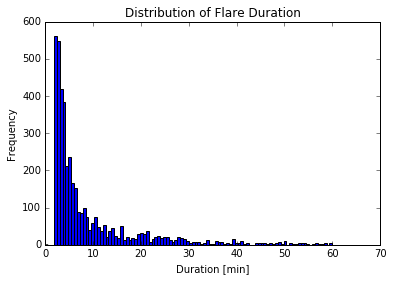

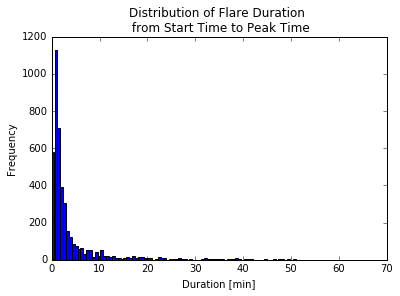

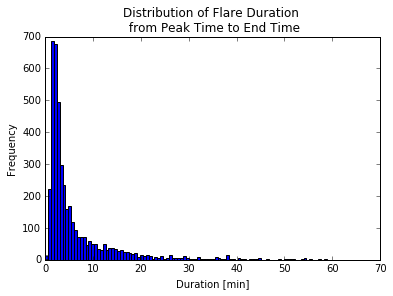

In [14]:
fl_end = np.array(map(parse_time, ef_flares['event_endtime']))

duration = fl_end - fl_start
duration = map(lambda x: (x.total_seconds())/60, duration)

start_peak_duration = fl_peak - fl_start
start_peak_duration = map(lambda x: (x.total_seconds())/60, start_peak_duration)
end_peak_duration = fl_end - fl_peak
end_peak_duration = map(lambda x: (x.total_seconds())/60, end_peak_duration)


plt.hist(duration, bins = 100, range = (0, 60))
_ = plt.title('Distribution of Flare Duration')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Duration [min]')

plt.show()

plt.hist(start_peak_duration, bins = 100, range = (0, 60))
_ = plt.title('Distribution of Flare Duration \n from Start Time to Peak Time')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Duration [min]')

plt.show()

plt.hist(end_peak_duration, bins = 100, range = (0, 60))
_ = plt.title('Distribution of Flare Duration \n from Peak Time to End Time')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Duration [min]')

plt.show()


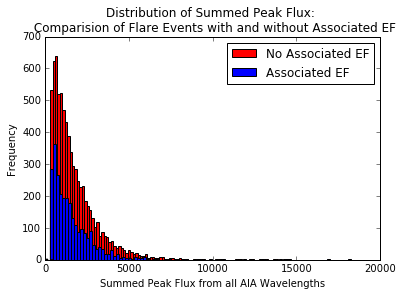

In [151]:
total_pk_flux = (flaress['fl_peakflux_131']+flaress['fl_peakflux_171']+ flaress['fl_peakflux_193']+ flaress['fl_peakflux_211']
                                  +flaress['fl_peakflux_304']+flaress['fl_peakflux_355']+flaress['fl_peakflux_94'])
no_ef_flares = flaress.ix[flaress['is_ef']==0]
ef_flares = flaress.ix[flaress['is_ef']==1]
flaress.loc[:, 'total_pk_flux'] = total_pk_flux
plt.xlabel('Summed Peak Flux from all AIA Wavelengths')
plt.ylabel('Frequency')
plt.title('Distribution of Summed Peak Flux: \n Comparision of Flare Events with and without Associated EF')


_=plt.hist(no_ef_flares['total_pk_flux'], bins = 100, color = 'r', label = 'No Associated EF')
_=plt.hist(ef_flares['total_pk_flux'], bins = 100, label = 'Associated EF')
_=plt.legend()

In [159]:
#function to remove nan values which have somehow crept into data
#scipy's linear regression function won't work with nan values

def remove_nans(x,y):
    x_m = np.ma.masked_array(x,mask=np.isnan(y)).compressed()
    y_m = np.ma.masked_array(y,mask=np.isnan(y)).compressed()
    x_m = np.ma.masked_array(x_m,mask=np.isnan(x_m)).compressed()
    y_m = np.ma.masked_array(y_m,mask=np.isnan(x_m)).compressed()
    return x_m, y_m
    

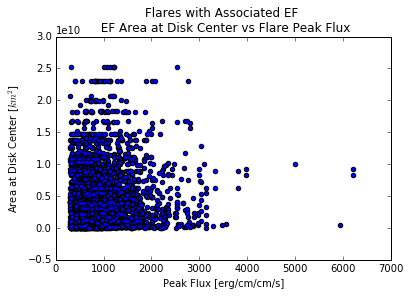

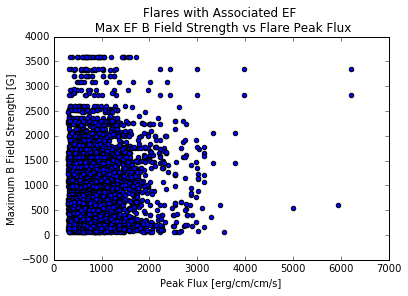

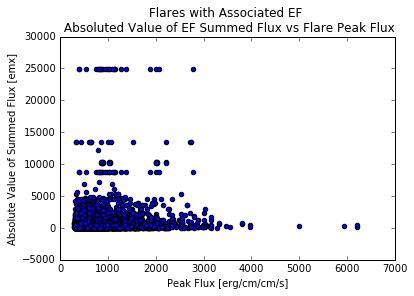

LinregressResult(slope=0.34646664955210466, intercept=648.54636446918471, rvalue=0.078343400803239732, pvalue=2.0154384707284599e-07, stderr=0.066548663353464474)

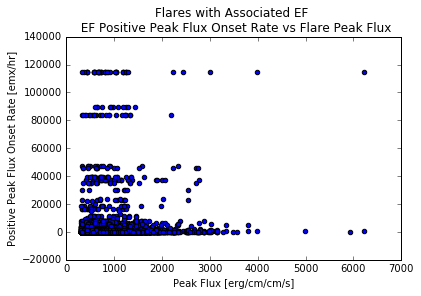

In [165]:
no_ef_flares = flare_ef.ix[flare_ef['is_ef']==0]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]


abs_sumflux_ef = ef_flares['ef_sumpossignedflux'] -ef_flares['ef_sumnegsignedflux']
peak_flux_ef = ef_flares['fl_peakflux']
maxmagfieldstrength = ef_flares['maxmagfieldstrength']

pospeakfluxonsetrate = ef_flares['ef_pospeakfluxonsetrate']

area_atdiskcenter = ef_flares['area_atdiskcenter']
plt.scatter(peak_flux_ef, area_atdiskcenter)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel(r'Area at Disk Center [$km^2$]')
plt.title('Flares with Associated EF \n EF Area at Disk Center vs Flare Peak Flux')
plt.show()


plt.scatter(peak_flux_ef, maxmagfieldstrength)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Maximum B Field Strength [G]')
plt.title('Flares with Associated EF \n Max EF B Field Strength vs Flare Peak Flux')
plt.show()

_ = plt.scatter(peak_flux_ef, abs_sumflux_ef)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.title('Flares with Associated EF \n Absoluted Value of EF Summed Flux vs Flare Peak Flux')

plt.show()


_ = plt.scatter(peak_flux_ef, pospeakfluxonsetrate)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Positive Peak Flux Onset Rate [emx/hr]')
_ = plt.title('Flares with Associated EF \n EF Positive Peak Flux Onset Rate vs Flare Peak Flux')
from scipy.stats import linregress

peak_flux_ef_m = np.ma.masked_array(peak_flux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
peak_flux_ef_m = np.ma.masked_array(peak_flux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()

linregress(peak_flux_ef_m, abs_sumflux_ef_m)




In [154]:
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]

r = 966
j = 0
length = ef_flares.shape[0]
zeroes = [0 for i in range(length)]
ef_flares.loc[:, 'distance'] = zeroes
for i in range(length):
    fl_point = Point((ef_flares['hpc_x'].values[i], ef_flares['hpc_y'].values[i]))
    ef_poly = wkt.loads(ef_flares['ef_hpc_bbox'].values[i])
    chord = fl_point.distance(ef_poly)
    s = r*np.arcsin(chord/(2*r))
    ef_flares['distance'].values[i] = s
    if s == 0:
        j+= 1
    
print j
print i
ratio = float(j)/float(i)
print ratio

float(j)/float(len(flare_ef))
#float(len(ef_flares))/float(len(flare_ef))

    

1556
4426
0.351558969724


0.22114837976122798

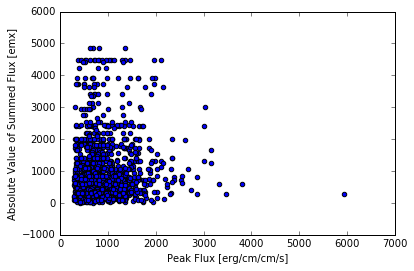

LinregressResult(slope=0.15545526829877218, intercept=820.77804890020934, rvalue=0.080782217555650238, pvalue=0.0018628793228858342, stderr=0.049875112774523167)
LinregressResult(slope=0.00017901405157379687, intercept=6.2747899691226605, rvalue=0.087106430224730136, pvalue=0.00079155030366640292, stderr=5.3235204324843463e-05)


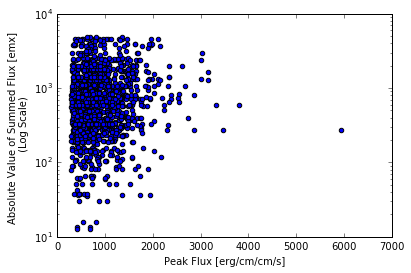

In [155]:
ef_contained = ef_flares.ix[ef_flares['distance']==0]
abs_sumflux_ef = ef_contained['ef_sumpossignedflux'] -ef_contained['ef_sumnegsignedflux']
ef_contained.loc[:, 'abs_sumflux_ef'] = abs_sumflux_ef
ef_contained = ef_contained.ix[ef_contained['abs_sumflux_ef']<=5000]
peak_flux_ef = ef_contained['fl_peakflux']
abs_sumflux_ef = ef_contained['abs_sumflux_ef']

_ = plt.scatter(peak_flux_ef, abs_sumflux_ef)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.show()
_ = plt.scatter(peak_flux_ef, ef_contained['abs_sumflux_ef'])
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx] \n (Log Scale)')
plt.semilogy()

from scipy.stats import linregress

peak_flux_ef_m = np.ma.masked_array(peak_flux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
peak_flux_ef_m = np.ma.masked_array(peak_flux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m_log = np.log(abs_sumflux_ef_m)

print linregress(peak_flux_ef_m, abs_sumflux_ef_m)
print linregress(peak_flux_ef_m, abs_sumflux_ef_m_log)

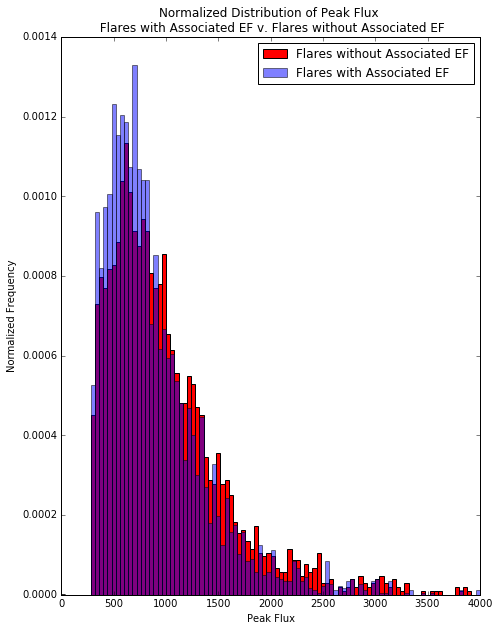

In [23]:
plt.figure(figsize=(7.5,10))
plt.title('Normalized Distribution of Peak Flux \n Flares with Associated EF v. Flares without Associated EF')
_ = plt.hist(peak_flux_no_ef, color = 'r', bins = 100, normed = True,label = 'Flares without Associated EF', range = (0,4000))
_ = plt.hist(peak_flux_ef, bins = 100, normed = True, label = 'Flares with Associated EF', range = (0,4000), alpha = 0.5)
plt.legend()
_ = plt.xlabel('Peak Flux')
_ = plt.ylabel('Normalized Frequency')

